In [278]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import process, fuzz
import numpy as np

In [158]:
bad_cache_ids = ['7c809b1393aca330038da2011920260d984d3aa8', '414b2a389a00ea655b47117d1bdd2136e23c7a5c', '3bf1bdd2add5568d0b29428641ddb505a295e9e2', '414f2804a8d7f24b1a783744c67d9d74b4d7d823', 'e427388be94ba24510b1ec4fbcc9337b56f21d92', '354a04af3231bb7c5b71da9298989ad17f048b56', '021f65c5a82db4ff1283e7420c65d963e48962af']
erc = pd.read_csv('../data/processed_erc.csv')
erc = erc[~erc['_cached_page_id'].isin(bad_cache_ids)]

In [159]:
erc['hi'] = erc['hi'].str.upper()
hi_sublist = [
    ('TECHNION ISRAEL INSTITUTE OF TECHNOLOGY', 'TECHNION - ISRAEL INSTITUTE OF TECHNOLOGY'),
    ('CENTRE NATIONAL DE LA RECHERCHE SCIENTIFIQUE', 'CENTRE NATIONAL DE LA RECHERCHE SCIENTIFIQUE CNRS'),
    ('IMPERIAL COLLEGE OF SCIENCE TECHNOLOGY AND MEDICINE', 'IMPERIAL COLLEGE OF SCIENCE, TECHNOLOGY AND MEDICINE'),
    ('THE MEDICAL RESEARCH COUNCIL', 'MEDICAL RESEARCH COUNCIL'),
    ('STICHTING VU', 'STICHTING VU-VUMC'),
    ('THE HEBREW UNIVERSITY OF JERUSALEM.', 'THE HEBREW UNIVERSITY OF JERUSALEM'),
    ("FUNDACIO PRIVADA INSTITUT CATALA D'INVESTIGACIO QUIMICA (ICIQ)", "FUNDACIO PRIVADA INSTITUT CATALA D'INVESTIGACIO QUIMICA"),
    ("MAX-PLANCK-GESELLSCHAFT ZUR FOERDERUNG DER WISSENSCHAFTEN E.V.", "MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISSENSCHAFTEN EV"),
    ("SCUOLA NORMALE SUPERIORE DI PISA", "SCUOLA NORMALE SUPERIORE"),
    ("TECHNISCHE UNIVERSITAT BERLIN", "TECHNISCHE UNIVERSITAET BERLIN")
]
for f, t in hi_sublist:
    erc.loc[erc['hi'] == f, 'hi'] = t
erc['panel'] = erc['panel'].str.strip()

def merging_candidates(df, colname):
    candidates = []
    choices = df[colname].unique()
    for index, row in df.iterrows():
        res = process.extract(row[colname], choices, limit=10, scorer=fuzz.token_sort_ratio)
        candidates.append((row[colname], res[1]))
    return candidates

def merge_candidates(df, colname, candidates, threshold):
    for f, (t, _) in [c for c in candidates if c[1][1] >= threshold]:
        [f, t] = sorted([f, t])
        df.loc[df[colname] == f, colname] = t

In [ ]:
cands = merging_candidates(erc, 'hi')

In [215]:
merge_candidates(erc, 'hi', cands, 100)

In [216]:
erc

,_cached_page_id,_template,_type,call,hi,pi,project,project_acronym,summary,url,kind,panel,shorcut,text,funding,start_date,end_date
0,ed2727c8ae3d3333fcdc8ea9993d532833c14761,26ae-47f7-a21f,ERC FUNDED PROJECTS ERC European Research Counc1,"Advanced Grant (AdG), PE3, ERC-2010-AdG_20100224",FYZIKALNI USTAV AV CR V.V.I,Tomáš Jungwirth,Spintronics based on relativistic phenomena in...,0MSPIN,Summary The 0MSPIN project consists of an exte...,https://erc.europa.eu/projects-figures/erc-fun...,Advanced Grant (AdG),PE3,ERC-2010-AdG_20100224,The 0MSPIN project consists of an extensive in...,1938000,2011-06-01,2016-05-31
1,ca0a21225368ee75ab62a5144f1590fd666c2e8f,26ae-47f7-a21f,ERC FUNDED PROJECTS ERC European Research Counc1,"Starting Grant (StG), PE1, ERC-2009-StG",KOBENHAVNS UNIVERSITET,Nathalie Wahl,"Surfaces, 3-manifolds and automorphism groups",2-3-AUT,Summary The scientific goal of the proposal is...,https://erc.europa.eu/projects-figures/erc-fun...,Starting Grant (StG),PE1,ERC-2009-StG,The scientific goal of the proposal is to answ...,724992,2009-11-01,2014-10-31
2,d3d2e5b2b5564cb587693649079e3410ccf4c21b,26ae-47f7-a21f,ERC FUNDED PROJECTS ERC European Research Counc1,"Proof of Concept (PoC), ERC-2016-PoC, ERC-2016...",INSTITUT PASTEUR,Marco VIGNUZZI,RNA virus attenuation by altering mutational r...,1toStopVax,Summary RNA viruses have extreme mutation freq...,https://erc.europa.eu/projects-figures/erc-fun...,Proof of Concept (PoC),ERC-2016-PoC,ERC-2016-PoC,RNA viruses have extreme mutation frequencies....,150000,2016-09-01,2018-02-28
3,e60977e5fc02e5e8ff7bb19dcbbfb4e20de9a2e1,26ae-47f7-a21f,ERC FUNDED PROJECTS ERC European Research Counc1,"Advanced Grant (AdG), PE1, ERC-2014-ADG",UNIVERSITY COLLEGE LONDON,ANDREW Granville,An alternative development of analytic number ...,1stProposal,Summary The traditional (Riemann) approach to ...,https://erc.europa.eu/projects-figures/erc-fun...,Advanced Grant (AdG),PE1,ERC-2014-ADG,The traditional (Riemann) approach to analytic...,2011742,2015-08-01,2020-07-31
4,bea28a66516640e69de5a645fa968f805f379a65,26ae-47f7-a21f,ERC FUNDED PROJECTS ERC European Research Counc1,"Starting Grant (StG), PE9, ERC-2012-StG_20111012",KOBENHAVNS UNIVERSITET,Martin Elias Pessah,A First Principles Approach to Accretion Discs,1st-principles-discs,"Summary Most celestial bodies, from planets, t...",https://erc.europa.eu/projects-figures/erc-fun...,Starting Grant (StG),PE9,ERC-2012-StG_20111012,"Most celestial bodies, from planets, to stars,...",1793697,2013-02-01,2018-01-31
5,21b9a2e3efe13b61cb44505152c426757f9d7556,26ae-47f7-a21f,ERC FUNDED PROJECTS ERC European Research Counc1,"Starting Grant (StG), SH4, ERC-2007-StG",UNIVERSITY OF GLASGOW,Alice Jenkins,Nineteenth-Century Euclid: Geometry and the Li...,19TH-CENTURY_EUCLID,Summary This radically interdisciplinary proje...,https://erc.europa.eu/projects-figures/erc-fun...,Starting Grant (StG),SH4,ERC-2007-StG,This radically interdisciplinary project aims ...,323118,2009-01-01,2011-10-31
6,9289e93da18614bf3a0f8e90905911a87db44566,26ae-47f7-a21f,ERC FUNDED PROJECTS ERC European Research Counc1,"Consolidator Grant (CoG), SH6, ERC-2013-CoG","THE CHANCELLOR, MASTERS AND SCHOLARS OF THE UN...",Cristina Dondi,The 15th-century Book Trade: An Evidence-based...,15CBOOKTRADE,Summary The idea that underpins this project i...,https://erc.europa.eu/projects-figures/erc-fun...,Consolidator Grant (CoG),SH6,ERC-2013-CoG,The idea that underpins this project is to use...,1999172,2014-04-01,2019-03-31
7,96cf174a271d6baa1c462252741b6941058cd29f,26ae-47f7-a21f,ERC FUNDED PROJECTS ERC European Research Counc1,"Advanced Grant (AdG), PE10, ERC-2015-AdG",MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISS...,Susan Trumbore,Radiocarbon constraints for models of C cyclin...,14Constraint,Summary The overall goal of 14Constraint is to...,https://erc.europa.eu/projects-figures/erc-fun...,Advanced Grant (AdG),PE10,ERC-2015-AdG,The overall goal of 14Constraint is to enhance...,2283747,2016-12-01,2021-11-

In [217]:
pi_sorted = pd.DataFrame(erc.groupby('pi').size(), columns=['cnt']).sort_values(by='cnt', ascending=False)

In [218]:
hi_sorted = pd.DataFrame(erc.groupby('hi').size(), columns=['cnt']).sort_values(by='cnt', ascending=False)

In [219]:
repeated_grants_for_ppl = pd.DataFrame(pi_sorted.groupby('cnt').size(), columns=['number of people'])

In [220]:
repeated_grants_for_ppl.index.names = ['number of grants']

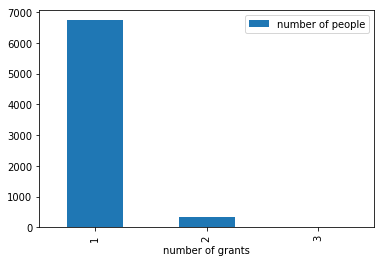

In [221]:
repeated_grants_for_ppl.plot.bar()

In [222]:
repeated_grants_for_ppl

,number of people
number of grants,
1,6734
2,339
3,16


In [167]:
more_grants_proba = repeated_grants_for_ppl[repeated_grants_for_ppl.index > 1].sum()["number of people"]/len(erc)

In [168]:
print("Probability you will have more than one grant: {}".format(more_grants_proba))

Probability you will have more than one grant: 0.04758713136729222


In [169]:
repeated_grants_for_unis = pd.DataFrame(hi_sorted.groupby('cnt').size(), columns=['number of universities'])

In [170]:
repeated_grants_for_unis.index.names = ['number of grants']

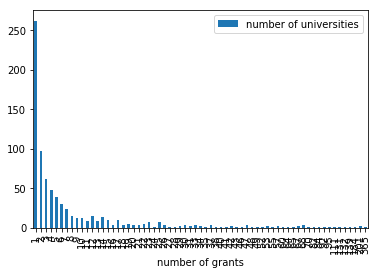

In [171]:
repeated_grants_for_unis.plot.bar()

In [213]:
hi_sorted

,cnt
hi,
CENTRE NATIONAL DE LA RECHERCHE SCIENTIFIQUE CNRS,365
"THE CHANCELLOR, MASTERS AND SCHOLARS OF THE UNIVERSITY OF OXFORD",201
"THE CHANCELLOR, MASTERS AND SCHOLARS OF THE UNIVERSITY OF CAMBRIDGE",201
MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISSENSCHAFTEN EV,184
UNIVERSITY COLLEGE LONDON,139
ECOLE POLYTECHNIQUE FEDERALE DE LAUSANNE,132
WEIZMANN INSTITUTE OF SCIENCE,131
THE HEBREW UNIVERSITY OF JERUSALEM,111
INSTITUT NATIONAL DE LA SANTE ET DE LA RECHERCHE MEDICALE,95


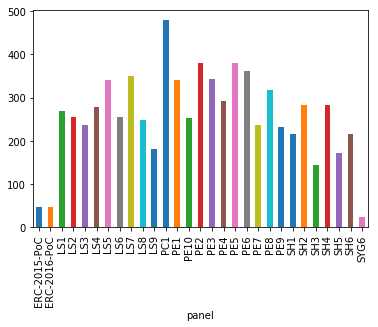

In [173]:
erc.groupby('panel').size().plot.bar()

In [174]:
erc['url'][0]

'https://erc.europa.eu/projects-figures/erc-funded-projects/results?search_api_views_fulltext=&page=0&items_per_page=1'

In [214]:
def ppl_from_different_unis():
    for index, row in erc.iterrows():
        person = row['pi']
        unis = erc[erc['pi'] == person].groupby('hi').size()
        if len(unis) != 1:
            print(person)
            print(unis)
ppl_from_different_unis()

Vincenzo Costanzo
hi
CANCER RESEARCH UK                                       1
IFOM FONDAZIONE ISTITUTO FIRC DI ONCOLOGIA MOLECOLARE    1
dtype: int64
Reinhard Kienberger
hi
MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISSENSCHAFTEN EV    1
TECHNISCHE UNIVERSITAET MUENCHEN                               1
dtype: int64
Reinhard Kienberger
hi
MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISSENSCHAFTEN EV    1
TECHNISCHE UNIVERSITAET MUENCHEN                               1
dtype: int64
Giulio Di Toro
hi
ISTITUTO NAZIONALE DI GEOFISICA E VULCANOLOGIA    1
THE UNIVERSITY OF MANCHESTER                      1
dtype: int64
Stephen Taylor Liddle
hi
THE UNIVERSITY OF MANCHESTER    1
THE UNIVERSITY OF NOTTINGHAM    1
dtype: int64
Dries Van Thourhout
hi
GHENT UNIVERSITY     1
UNIVERSITEIT GENT    1
dtype: int64
Stephen Taylor Liddle
hi
THE UNIVERSITY OF MANCHESTER    1
THE UNIVERSITY OF NOTTINGHAM    1
dtype: int64
Heino Falcke
hi
STICHTING KATHOLIEKE UNIVERSITEIT                                      

Rosa Cossart
hi
INSTITUT NATIONAL DE LA SANTE ET DE LA RECHERCHE MEDICALE    1
UNIVERSITE D'AIX MARSEILLE                                   1
dtype: int64
Alexander Bronstein
hi
TECHNION - ISRAEL INSTITUTE OF TECHNOLOGY    1
TEL AVIV UNIVERSITY                          1
dtype: int64
Martin SCHRODER
hi
THE UNIVERSITY OF MANCHESTER    1
THE UNIVERSITY OF NOTTINGHAM    1
dtype: int64
Andrea Ferrari
hi
THE CHANCELLOR, MASTERS AND SCHOLARS OF THE UNIVERSITY OF CAMBRIDGE    1
THE UNIVERSITY OF MANCHESTER                                           1
dtype: int64
Jeffrey William BODE
hi
EIDGENOESSISCHE TECHNISCHE HOCHSCHULE ZUERICH    1
EIDGENÖSSISCHE TECHNISCHE HOCHSCHULE ZÜRICH      1
dtype: int64
Andrea Ferrari
hi
THE CHANCELLOR, MASTERS AND SCHOLARS OF THE UNIVERSITY OF CAMBRIDGE    1
THE UNIVERSITY OF MANCHESTER                                           1
dtype: int64
Maria Rescigno
hi
ISTITUTO EUROPEO DI ONCOLOGIA SRL    1
UNIVERSITA DEGLI STUDI DI MILANO     1
dtype: int64
Mérouane Debb

In [176]:
import editdistance


In [177]:
editdistance.eval("df", "afasdasdsdfsdffgsdfgsdfgsdfgdfgdfgas")

34

[('STICHTING HET NEDERLANDS KANKER INSTITUUT-ANTONI VAN LEEUWENHOEK ZIEKENHUIS',
  ('STICHTING HET NEDERLANDS KANKER INSTITUUT - ANTONI VAN LEEUWENHOEK ZIEKENHUIS',
   100)),
 ('NATIONAL UNIVERSITY OF IRELAND GALWAY',
  ('NATIONAL UNIVERSITY OF IRELAND, GALWAY', 100)),
 ('NATIONAL UNIVERSITY OF IRELAND, GALWAY',
  ('NATIONAL UNIVERSITY OF IRELAND, GALWAY', 100)),
 ('STICHTING HET NEDERLANDS KANKER INSTITUUT - ANTONI VAN LEEUWENHOEK ZIEKENHUIS',
  ('STICHTING HET NEDERLANDS KANKER INSTITUUT - ANTONI VAN LEEUWENHOEK ZIEKENHUIS',
   100)),
 ('UNIVERSITY COLLEGE CORK - NATIONAL UNIVERSITY OF IRELAND, CORK',
  ('UNIVERSITY COLLEGE CORK, NATIONAL UNIVERSITY OF IRELAND, CORK', 100)),
 ('UNIVERSITY COLLEGE CORK - NATIONAL UNIVERSITY OF IRELAND, CORK',
  ('UNIVERSITY COLLEGE CORK, NATIONAL UNIVERSITY OF IRELAND, CORK', 100)),
 ('STICHTING HET NEDERLANDS KANKER INSTITUUT - ANTONI VAN LEEUWENHOEK ZIEKENHUIS',
  ('STICHTING HET NEDERLANDS KANKER INSTITUUT - ANTONI VAN LEEUWENHOEK ZIEKENHUIS',
   1

In [179]:
def kinds(df):
    return pd.DataFrame(df.groupby('kind').size(), columns=['cnt']).sort_values(by='cnt', ascending=False)

In [182]:
kinds(erc)

,cnt
kind,
Starting Grant (StG),3419
Advanced Grant (AdG),2243
Consolidator Grant (CoG),1203
Proof of Concept (PoC),570
Synergy Grants (SyG),24
Support Actions (SA),1


In [183]:
kinds(erc[erc['panel'] == 'PE6'])

,cnt
kind,
Starting Grant (StG),202
Advanced Grant (AdG),94
Consolidator Grant (CoG),66


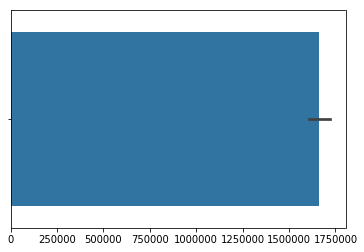

In [239]:
funding = erc.groupby('hi').mean().sort_values("funding", ascending=False)
sns.barplot(funding)

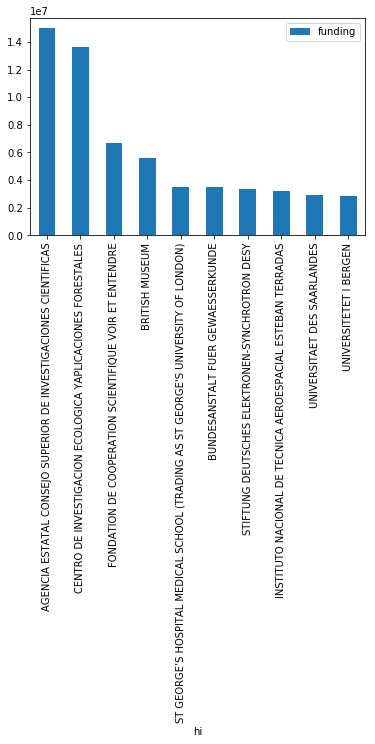

In [245]:
funding.head(10).plot.bar()

In [246]:
funding.head(10)

,funding
hi,
AGENCIA ESTATAL CONSEJO SUPERIOR DE INVESTIGACIONES CIENTIFICAS,1.498326e+07
CENTRO DE INVESTIGACION ECOLOGICA YAPLICACIONES FORESTALES,1.360058e+07
FONDATION DE COOPERATION SCIENTIFIQUE VOIR ET ENTENDRE,6.680562e+06
BRITISH MUSEUM,5.574362e+06
ST GEORGE’S HOSPITAL MEDICAL SCHOOL (TRADING AS ST GEORGE'S UNIVERSITY OF LONDON),3.488863e+06
BUNDESANSTALT FUER GEWAESSERKUNDE,3.473400e+06
STIFTUNG DEUTSCHES ELEKTRONEN-SYNCHROTRON DESY,3.356600e+06
INSTITUTO NACIONAL DE TECNICA AEROESPACIAL ESTEBAN TERRADAS,3.246000e+06
UNIVERSITAET DES SAARLANDES,2.889583e+06


In [256]:
for hi in funding.index: print(len(erc[erc['hi'] == hi]))

1
1
2
2
1
1
7
1
6
14
1
1
1
2
1
1
15
8
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
1
1
1
1
1
2
1
3
1
4
3
1
1
17
1
2
1
1
10
1
2
1
2
2
3
2
1
1
1
2
4
3
1
3
2
6
4
1
22
5
11
2
4
18
4
4
3
1
8
3
7
3
1
4
5
9
6
15
11
1
8
5
4
13
10
2
6
40
2
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
3
2
1
1
8
53
1
2
1
1
3
184
3
3
2
3
8
1
1
9
3
1
3
1
2
1
1
7
8
2
7
1
2
11
1
2
3
4
1
2
13
67
3
5
6
3
11
46
1
12
10
1
2
14
2
7
3
5
1
12
10
5
2
14
12
1
4
57
25
22
10
14
5
4
9
49
1
4
2
14
7
1
1
3
4
1
5
12
27
1
4
5
1
68
17
12
25
1
1
4
1
82
33
18
5
12
1
3
37
201
3
7
7
8
1
6
33
1
7
3
1
6
9
12
6
8
5
3
3
12
9
1
84
17
13
3
2
3
10
6
57
4
47
14
1
9
17
55
1
68
5
2
34
1
1
2
2
70
2
5
1
13
33
1
2
5
11
4
48
2
1
6
95
1
1
4
17
1
4
20
19
2
3
42
30
9
22
2
1
9
201
18
6
1
23
15
23
65
2
11
1
5
139
9
7
38
19
17
1
4
15
42
6
2
17
15
17
3
1
12
15
1
7
28
3
8
132
1
1
1
15
4
4
2
47
2
2
52
7
14
5
20
20
1
14
3
6
13
16
365
17
6
7
5
2
4
30
19
15
14
6
34
13
4
1
5
92
31
29
1
5
25
23
64
5
6
4
25
3
21
5
4
5
37
12
41
111
1
17
33
6
2
2
2
3
2
29
1
23
3
21
4
22
12
5
68
4

In [254]:
funding

,funding
hi,
AGENCIA ESTATAL CONSEJO SUPERIOR DE INVESTIGACIONES CIENTIFICAS,1.498326e+07
CENTRO DE INVESTIGACION ECOLOGICA YAPLICACIONES FORESTALES,1.360058e+07
FONDATION DE COOPERATION SCIENTIFIQUE VOIR ET ENTENDRE,6.680562e+06
BRITISH MUSEUM,5.574362e+06
ST GEORGE’S HOSPITAL MEDICAL SCHOOL (TRADING AS ST GEORGE'S UNIVERSITY OF LONDON),3.488863e+06
BUNDESANSTALT FUER GEWAESSERKUNDE,3.473400e+06
STIFTUNG DEUTSCHES ELEKTRONEN-SYNCHROTRON DESY,3.356600e+06
INSTITUTO NACIONAL DE TECNICA AEROESPACIAL ESTEBAN TERRADAS,3.246000e+06
UNIVERSITAET DES SAARLANDES,2.889583e+06


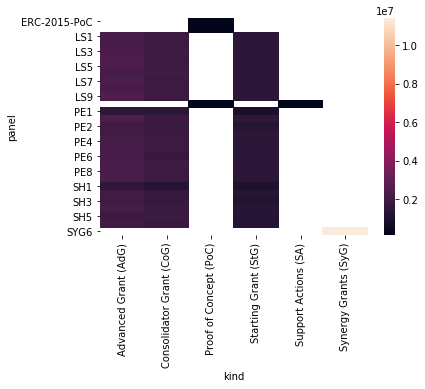

In [287]:
pk = erc.groupby(['panel', 'kind']).mean()['funding']
pk = pd.DataFrame(pk)
# pk.transpose()
# sns.heatmap(pk, annot=True)
# pk.pivot_table(index=['m','r','s'], columns=['p'], values=['O','W','N'])
pivoted = pd.pivot_table(pk, values='funding', index=['panel'], columns=['kind'], aggfunc=np.sum)
sns.heatmap(pivoted)

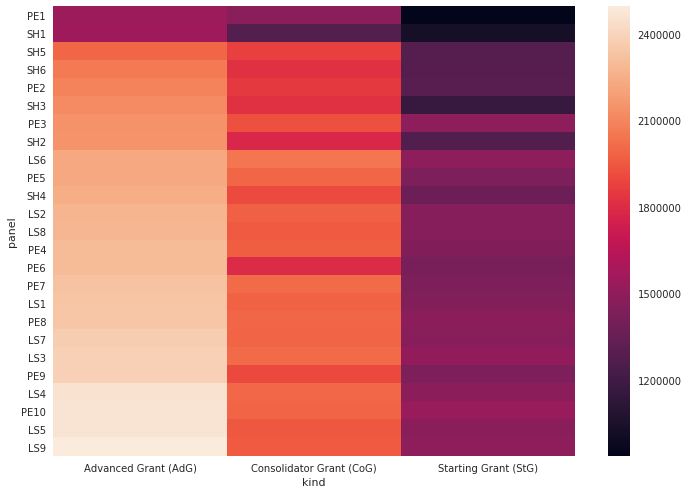

In [321]:
pivoted_stripped = pivoted.loc[~pivoted.index.isin(['ERC-2015-PoC', 'ERC-2016-PoC', 'SYG6', 'PC1']), ~pivoted.columns.isin(['Synergy Grants (SyG)', 'Support Actions (SA)', 'Proof of Concept (PoC)'])]
pivoted_stripped = pivoted_stripped.sort_values(by=['Advanced Grant (AdG)'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(pivoted_stripped)

In [317]:
erc[erc['panel'] == 'LS9']['summary'][51]

'Summary Plant breeders are challenged with sustaining global crop improvements. Is there a limit to crop yield? This project will address this central question using processing tomatoes as a model for a mechanized crop. By integrating in a single web-based platform of ‘Phenom Networks’ a broad germplasm base, deep phenotypes, and multiple genome sequences of tomato species, we will identify the genes and mechanisms that dictate crop productivity and implement them in the creation of next generation F1 hybrids. Our work is founded on our years of efforts to establish the following integrated genetic pillars: 1) The tomato genome revealed SNPs for broader marker-assisted selection between cultivated parents and untapped diversity from closely-related red-fruited ancestors. We will develop new elite parental lines into which all discovered traits will be introduced. 2) We will enrich the narrow genetic base of modern processing tomato by pyramiding recessive, additive, dominant and overd

In [318]:
pivoted_stripped

kind,Advanced Grant (AdG),Consolidator Grant (CoG),Starting Grant (StG)
panel,,,
PE1,1.543101e+06,1.476897e+06,9.354074e+05
SH1,1.547386e+06,1.279028e+06,1.027767e+06
SH5,1.991642e+06,1.872788e+06,1.279057e+06
SH6,2.059871e+06,1.819793e+06,1.288425e+06
PE2,2.087663e+06,1.852544e+06,1.300189e+06
SH3,2.118334e+06,1.819740e+06,1.165629e+06
PE3,2.145562e+06,1.927182e+06,1.494688e+06
SH2,2.152029e+06,1.779396e+06,1.268102e+06
LS6,2.222979e+06,2.047455e+06,1.495772e+06
